In [24]:
# %matplotlib widget
# ACHTUNG:  Bei manchen Jupyter-Installationen funktioniert kein 'widget'.
#           In diesem Fall muss '%matplotlib notebook' einkommentiert und
#           die obere Zeile auskommentiert werden.
# %matplotlib notebook
%matplotlib inline

import math
import unittest
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle
import re
import numpy as np

In [22]:
%%html
<!--Bitte diese Cell mit Run ausführen, damit die Styles geladen werden-->
<!--Bei Änderungen des CSS muss das Notebook im Browser neu geladen werden-->
<link rel="stylesheet" href="./styles/sciprolab.css">

# Komplexe Zahlen

## Was sind komplexe Zahlen?

Komplexe Zahlen erweitern die reellen Zahlen, sodass auch Gleichungen wie $\sqrt{-1} = i$ lösbar werden.

## Menge der komplexen Zahlen
Die Menge der komplexen Zahlen ist definiert als \
$$
\mathbb{C} = \{a + bi | a, b \in \mathbb{R}, i^2 = -1\}
$$
Diese Definition beschreibt die komplexen Zahlen als Zahlen, die sich aus einem realen Teil ($a$) und einem imaginären Teil ($b$) zusammensetzen, wobei der imaginäre Teil mit der imaginären Einheit $i$ multipliziert wird.

## Darstellung

Eine komplexe Zahl hat die Form
$$
z = a + bi
$$
wobei:
- $a$ der reale Teil ist,
- $b$ der imaginäre Teil ist,
- $i$ die imaginäre Einheit ist, definiert durch $i^2 = -1$

## Beziehung zu anderen Zahlengruppen

Komplexe Zahlen erweitern die Menge der reellen Zahlen $\mathbb{R}$ und bauen auf anderen Zahlenmengen auf.

### 1. Natürliche Zahlen ($\mathbb{N}$)

* **Definition:** Positive ganze Zahlen (1, 2, 3, ...)
* **Beziehung zu komplexen Zahlen:**: Die natürlichen Zahlen sind in den komplexen Zahlen enthalten, da jede natürliche Zahl als komplexe Zahl mit einem Imaginärteil von 0 dargestellt werden kann ($n = n + 0i)$.

### 2. Ganze Zahlen ($\mathbb{Z}$)

* **Definition:** Alle positiven und negativen Zahlen, einschließlich 0 (..., -2, -1, 0, 1, 2,...)
* **Beziehung zu komplexen Zahlen:** Ganze Zahlen sind ebenfalls Teil der komplexen Zahlen, da jede ganze Zahl in der Form z = n + 0i geschrieben werden kann

### 3. Rationale Zahlen ($\mathbb{Q}$)

* **Definition:** Brüche der Form $\frac{p}{q}$, wobei $p, q \in \mathbb{Z}$ und $p ≠ q$
* **Beziehung zu komplexen Zahlen:** Rationale Zahlen können als komplexe Zahlen mit Imaginärteil 0 dargestellt werden ($\frac{p}{q} = \frac{p}{q} + 0i$)

### 4. Reelle Zahlen ($\mathbb{R}$)

* **Definition:** Zahlen, die auf der reellen Zahlengeraden liegen, einschließlich rationaler und irrationaler Zahlen
* **Beziehung zu komplexen Zahlen:** Jede reelle Zahl ist eine spezielle komplexe Zahl mit einem Imaginärteil von ($x = x + 0i$). Die reellen Zahlen bilden also eine Teilmenge der komplexen Zahlen.

### 5. Imaginäre Zahlen

* **Definition:** Zahlen, die das Produkt einer rellen Zahl und der imaginären Einheit i sind ($bi$, wobei $b \in \mathbb{R}$
* **Beziehung zu komplexen Zahlen:** Imaginäre Zahlen sind spezielle komplexe Zahlen, bei denen der Realteil 0 ist ($z = 0 + bi$)

### Zusammenfassung

Natürliche Zahlen $\mathbb{N}$, Ganze Zahlen $\mathbb{Z}$ und Rationale Zahlen $\mathbb{Q}$ sind Teilmengen der reellen Zahlen $\mathbb{R}$, und daher auch von $\mathbb{C}$.
Mit anderen Worten, jede natürliche, ganze oder rationale Zahl kann als komplexe Zahl mit Imaginärteil 0 betrachtet werden.
$$
\mathbb{N} \subseteq \mathbb{Z} \subseteq \mathbb{Q} \subseteq \mathbb{R} \subseteq \mathbb{C}
$$


<center>
  <img src="Pictures/Zahlenmengen.png" width="512" height="288"/>
</center>

## Anwendung

Komplexe Zahlen werden in vielen Bereichen der Mathematik, Physik, Technik und Informatik verwendet, da sie Probleme lösen, die mit reellen Zahlen alleine nicht lösbar wären.

### Beispiele

#### 1. Elektrotechnik:

* Komplexe Zahlen helfen bei der Analyse von Wechselstromkreisen
* Sie vereinfachen Berechnungen zu Spannung, Strom, Impedanz und Phasenverschiebung
* Ingenieure können dadurch Schaltkreise effizienter entwerfen

#### 2. Maschinenbau & Schwingungen:

* Schwingungen und Wellen in Strukturen und Maschinen werden oft mit komplexen Zahlen beschrieben
* Die Amplitude und Phase von Schwingungen lassen sich so mathematisch einfach darstellen

#### 3. Physik & Quantenmechanik:

* In der Quantenmechanik werden Wellenfunktionen mit komplexen Zahlen beschrieben
* Diese geben die Wahrscheinlichkeit an, ein Teilchen an einem bestimmten Ort zu finden
* Auch im Elektromagnetismus und der Fluiddynamik werden komplexe Zahlen genutzt

#### 4. Computergrafik & Fraktale:

* Fraktale, wie das Mandelbrot-Set, basieren auf komplexen Zahlen
* Sie ermöglichen faszinierende mathematische Muster und sind in der Computergrafik weit verbreitet

#### 5. Quantencomputing:

* Quantencomputer nutzen komplexe Zahlen zur Beschreibung von Qubits und deren Superposition
* Algorithmen wie Shors Algorithmus arbeiten mit komplexen Zahlen, um rechenintensive Probleme effizient zu lösen

In [17]:
class ComplexNumberError(Exception):
    pass

class ComplexZeroError(Exception):
    pass


class ComplexNumber:

    def __init__(self, real, imag):
        if not isinstance(real, (int, float)) or not isinstance(imag, (int, float)):
            raise TypeError("Die Eingabewerte müssen Zahlen (int oder float) sein.")
        self.real = real
        self.imag = imag

    def __repr__(self):
        return f"ComplexNumber({self.real}, {self.imag})"

    def __str__(self):
        if self.imag >= 0:
            return f"{self.real} + {self.imag}i"
        else:
            return f"{self.real} - {-self.imag}i"

    def get_real(self):
        return self.real

    def get_imag(self):
        return self.imag

    def __add__(self, other):
        if type(other) in (int,float):
            new_real = self.real + other
            new_imag = self.imag
            return ComplexNumber(new_real, new_imag)
        elif type(other) == ComplexNumber:
            new_real = self.real + other.real
            new_imag = self.imag + other.imag
            return ComplexNumber(new_real, new_imag)
        else:
            raise TypeError

    def __sub__(self, other):
        if type(other) in (int,float):
            new_real = self.real - other
            new_imag = self.imag
            return ComplexNumber(new_real, new_imag)
        elif type(other) == ComplexNumber:
            new_real = self.real - other.real
            new_imag = self.imag - other.imag
            return ComplexNumber(new_real, new_imag)
        else:
            raise TypeError

    def __mul__(self,other):
        if type(other) in (int,float):
            new_real = self.real * other
            new_imag = self.imag * other
            return ComplexNumber(new_real, new_imag)
        elif type(other) == ComplexNumber:
            new_real = self.real * other.real - self.imag * other.imag
            new_imag = self.real * other.imag + self.imag * other.real
            return ComplexNumber(new_real, new_imag)
        else:
            raise TypeError

    def __truediv__(self,other):
        if type(other) in (int,float):
            new_real = self.real / other
            new_imag = self.imag / other
            return ComplexNumber(new_real, new_imag)
        elif type(other) == ComplexNumber:
            if other.real == 0 and other.imag == 0:
                raise ComplexNumberError("Division durch Null ist nicht definiert für komplexe Zahlen.")
            div = other.real**2 + other.imag**2
            new_real = (self.real * other.real + self.imag * other.imag) / div
            new_imag = (self.imag * other.real - self.real * other.imag) / div
            return ComplexNumber(new_real, new_imag)
        else:
            raise TypeError

    def __radd__(self,other):
        return self + other

    def __rsub__(self,other):
        if type(other) in (float,int):
            return ComplexNumber(other-self.real,-self.imag)
        else:
            raise TypeError

    def __rmul__(self,other):
        return self * other

    def __rtruediv__(self,other):
        if type(other) in (int,float):
            return ComplexNumber(other,0) / self
        else:
            raise TypeError


    def __eq__(self,other):
        return self.real == other.real and self.imag == other.imag
    """
    def __eq__(self, other):
        tolerance = 1e-14  # Toleranzbereich für den Vergleich
        return abs(self.real - other.real) < tolerance and abs(self.imag - other.imag) < tolerance
    """

    def __neg__(self):
        return ComplexNumber(-self.real,-self.imag)

    def is_real(self):
        return self.imag == 0

    def __pow__(self, power):
        """Potenzieren einer komplexen Zahl"""
        r, theta = self.to_polar()  # Umrechnung in Polarform
        r_new = r ** power
        theta_new = theta * power
        return self.to_cart(r_new, theta_new)

    def __abs__(self):
        return math.sqrt(self.real**2 + self.imag**2)

    def to_real(self):
        "Prüft, ob die Zahl reell ist und gibt sie als reelle Zahl zurück"
        if self.imag == 0:
            return self.real
        else:
            return self

    def to_polar(self):
        "Umrechnung von kartesischen Koordinaten (Real, Imaginär) in Polarkoordinaten (r, theta)"
        if self.real == 0:
            raise ComplexZeroError
        else:
            r = math.sqrt(self.real**2 + self.imag**2)
            theta = math.atan2(self.imag, self.real)
            return r, theta

    def to_cart(self, r, theta):
        """Umrechnung von Polarkoordinaten (r, theta) in kartesische Koordinaten (Real, Imaginär)"""
        real = r * math.cos(theta)
        imag = r * math.sin(theta)
        return ComplexNumber(real, imag)

    def conjugate(self):
        return ComplexNumber(self.real, -self.imag)

    def to_tuple(self):
        return self.real, self.imag

## Tests

Um Fehler mit falschen Typeingaben oder falsche Implementierungen erkennen zu können, werden Tests benutzt. Die Tests für die Klasse 'ComplexNumber' stehen im folgenden Codeblock

In [18]:
class TestComplexNumber(unittest.TestCase):

    def test_init_valid(self):
        # Test gültige Eingabewerte
        cn = ComplexNumber(3, 4)
        self.assertEqual(cn.get_real(), 3)
        self.assertEqual(cn.get_imag(), 4)

    def test_init_invalid(self):
        # Test ungültige Eingabewerte
        with self.assertRaises(TypeError):
            ComplexNumber(3, "4")
        with self.assertRaises(TypeError):
            ComplexNumber("3", 4)

    def test_repr(self):
        # Test die __repr__ Methode
        cn = ComplexNumber(3, 4)
        self.assertEqual(repr(cn), "ComplexNumber(3, 4)")

    def test_str(self):
        # Test die __str__ Methode
        cn1 = ComplexNumber(3, 4)
        cn2 = ComplexNumber(3, -4)
        self.assertEqual(str(cn1), "3 + 4i")
        self.assertEqual(str(cn2), "3 - 4i")

    def test_add(self):
        # Test Addition von komplexen Zahlen
        cn1 = ComplexNumber(3, 4)
        cn2 = ComplexNumber(1, 2)
        result = cn1 + cn2
        self.assertEqual(result.get_real(), 4)
        self.assertEqual(result.get_imag(), 6)

    def test_sub(self):
        # Test Subtraktion von komplexen Zahlen
        cn1 = ComplexNumber(3, 4)
        cn2 = ComplexNumber(1, 2)
        result = cn1 - cn2
        self.assertEqual(result.get_real(), 2)
        self.assertEqual(result.get_imag(), 2)

    def test_mul(self):
        # Test Multiplikation von komplexen Zahlen
        cn1 = ComplexNumber(3, 4)
        cn2 = ComplexNumber(1, 2)
        result = cn1 * cn2
        self.assertEqual(result.get_real(), -5)
        self.assertEqual(result.get_imag(), 10)

    def test_truediv(self):
        # Test Division von komplexen Zahlen
        cn1 = ComplexNumber(3, 4)
        cn2 = ComplexNumber(1, 2)
        result = cn1 / cn2
        self.assertAlmostEqual(result.get_real(), 2.2, places=1)
        self.assertAlmostEqual(result.get_imag(), -0.4, places=1)

    def test_truediv_zero_divisor(self):
        # Test Division durch Null
        cn1 = ComplexNumber(3, 4)
        cn2 = ComplexNumber(0, 0)
        with self.assertRaises(ComplexNumberError):
            cn1 / cn2

    def test_eq(self):
        # Test Vergleich von komplexen Zahlen
        cn1 = ComplexNumber(3, 4)
        cn2 = ComplexNumber(3, 4)
        cn3 = ComplexNumber(2, 4)
        self.assertTrue(cn1 == cn2)
        self.assertFalse(cn1 == cn3)

    def test_is_real(self):
        # Test, ob die Zahl reell ist
        cn1 = ComplexNumber(3, 0)
        cn2 = ComplexNumber(3, 4)
        self.assertTrue(cn1.is_real())
        self.assertFalse(cn2.is_real())

    def test_pow(self):
        # Test Potenzierung einer komplexen Zahl
        cn = ComplexNumber(1, 1)
        result = cn ** 2
        self.assertAlmostEqual(result.get_real(), 0)
        self.assertAlmostEqual(result.get_imag(), 2)

    def test_to_real(self):
        # Test, ob die Zahl reell ist und als reelle Zahl zurückgegeben wird
        cn1 = ComplexNumber(3, 0)
        cn2 = ComplexNumber(3, 4)
        self.assertEqual(cn1.to_real(), 3)
        self.assertEqual(cn2.to_real(), cn2)

    def test_to_polar(self):
        # Test Umrechnung in Polarform
        cn = ComplexNumber(1, 1)
        r, theta = cn.to_polar()
        self.assertAlmostEqual(r, math.sqrt(2), places=5)
        self.assertAlmostEqual(theta, math.pi / 4, places=5)

    def test_conjugate(self):
        # Test der Konjugierten
        cn = ComplexNumber(3, 4)
        result = cn.conjugate()
        self.assertEqual(result.get_real(), 3)
        self.assertEqual(result.get_imag(), -4)

    def test_to_tuple(self):
        # Test Umwandlung in ein Tupel
        cn = ComplexNumber(3, 4)
        self.assertEqual(cn.to_tuple(), (3, 4))


if __name__ == '__main__':
    unittest.main(argv=[""], exit=False)

................
----------------------------------------------------------------------
Ran 16 tests in 0.017s

OK


# Diagramme

Komplexe Zahlen können auf verschiedene Arten dargestellt werden, basierend auf der Schreibweise und der Koordinatenart.

### kartesische vs. Polarkoordinaten

Wie bereits in der Einführung erklärt, können komplexe Zahlen als Punkte in einem kartesischen 2D Koordinatensystem dargestellt werden, mit sogenannten kartesischen Koordinaten.
Es gibt jedoch noch eine andere Schreibweise komplexe Zahlen darzustellen, die sogenannten Polarkoordinaten.
Der Gedanke hinter dieser Darstellung ist, dass man eine Zahl $r$ hat, welche den Betrag des Ortsvektors zum Punkt $P$ bzw. er komplexen Zahl $c$ angibt, und einen Winkel $\phi$, welcher den Winkel des Vektors zur Realachse, also der x-Achse angibt. Damit kann man ebenfalls den Ortsvektor bestimmen und damit auch die komplexe Zahl $c$.
Nachfolgend eine Klasse zur Implementierung der komplexen Zahlen mit Polarkoordinaten. Da alle Operationen und Methoden auf der `ComplexNumber` Klasse aufbauen, enthält diese nur die nötigsten Methoden.

<div class="definition">
    <h3>Polarkoordinaten</h3>
    Polarkoordinaten stellen einen Punkt im 2D Raum dar, indem sie den Betrag des Ortsvektors und den Winkel der x-Achse nutzen um diesen Punkt zu bestimmen.
</div>

In [19]:
class PolarComplexNumber:

    def __init__(self, r, theta):
        self.r = r
        self.theta = theta

    def __str__(self):
        return f"PolarComplexNumber({self.r}, {self.theta})\nnumber: {self.r} + e^({self.theta}i)"

    def to_cartesian(self) -> 'ComplexNumber':
        return ComplexNumber(self.r * math.cos(self.theta), self.r * math.sin(self.theta))

## Darstellung

Die komplexen Zahlen können mit den folgenden Funktionen in Koordinatensystemen dargestellt werden:

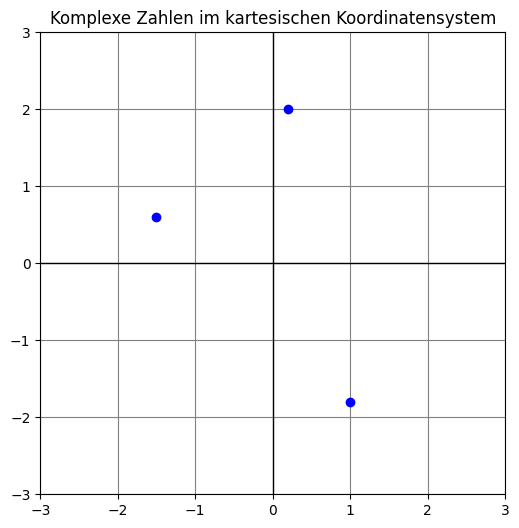

In [25]:
def show_in_cart(c):
    plt.figure(figsize=(6, 6))
    plt.axhline(0, color='black', linewidth=1.0, linestyle='solid')
    plt.axvline(0, color='black', linewidth=1.0, linestyle='solid')
    for n in c:
        plt.plot(n.real, n.imag, 'bo')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.title(f"Komplexe Zahlen im kartesischen Koordinatensystem")
    plt.grid(color='gray', which='both')
    plt.show()

show_in_cart([ComplexNumber(0.2, 2), ComplexNumber(-1.5, 0.6), ComplexNumber(1, -1.8)])

mit Polarkoordinaten:

In [9]:
def show_in_polar(c):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    for n in c:
        r, theta = n.to_polar()
        ax.set_rticks([1, 2, 3])
        ax.scatter(theta, r, color='b')
        ax.set_title("Komplexe Zahlen in Polardarstellung")

show_in_polar([ComplexNumber(0.2, 2), ComplexNumber(-1.5, 0.6), ComplexNumber(1, -1.8)])

<IPython.core.display.Javascript object>

# Taschenrechner

Selbstverständlich kann mit komplexen Zahlen auch gerechnet werden. Hierfür wird ein Taschenrechner implementiert, welcher die vom Nutzer eingegebenen komplexen Zahlen mit der jeweils ausgewählten Operation verrechnet

## Aufbau Nutzereingabe

Da die Rechnung grafisch dargestellt werden soll, ist die Nutzereingabe in Rechnung und Komplexe Zahlen unterteilt.
Die Eingabe selbst findet später ihren Platz, vorhergehend werden Abhänigkeiten besprochen und implementiert.

## Eingabe

Die Eingabe und Erfassung der komplexen Zahlen ist etwas anspruchsvoller, weshalb sie weiterhin unterteilt ist. Folgend wird die Eingabe des Nutzers abgefragt und nach Entfernen von Leerzeichen und anderen Füllzeichen an andere Methoden weitergegeben.

In [11]:
def eingabe(satz):
    print(satz)
    # später die komplexe Zahl
    komplex = None
    # solange die Eingabe falsch ist wiederholen
    while komplex is None:
        # Eingabe des Nutzers
        eingabe = input()
        # Leerzeichen aus der Eingabe entfernen
        striped_eingabe=''
        for i in eingabe:
            striped_eingabe = striped_eingabe+( i if i != ' ' else '')
        # komplex wird gesetzt, falls die Eingabe richtig war,
        # sonst wird die Schleife wiederholt
        try:
            komplex = check_the_string(striped_eingabe.strip())
        except ComplexNumberError:
            continue
    # Rückgabe der Zahl
    return komplex

Hier wird der formatierte String nun an die Funktion check_the_string() weitergegeben, die verschiedenste Methoden aufruft, um den String auf Richtigkeit zu überprüfen und ihn schlussendlich an die Methode rechnen() weitergibt.
Um die Überprüfung zu tätigen, wird das Modul 're' importiert, welches für Regular Expression steht und bei der Formatierung von Strings hilft.
Zudem wird die math Bibliothek benutzt.

### String überprüfen

Um zu überprüfen, ob der String Zeichen nutzt, die für die Rechnung nicht benötigt werden, gibt es die Methoden check_the_string() und check_chars(). Hier werden alle Zeichen auf die verwendbaren Zeichen überprüft.

In [12]:
def check_the_string(string):
    # string="2pi+isin(2pi)"
    # fehler string="2"
    # string="i"
    check_chars(string)
    string = check_double(string)
    string = check_bracket_standard(string)
    string = re.sub(r"sin","Sin",string)
    check_i_sin_cos(string)
    string = check_pi(string)
    check_brackets(string)
    string = standardize_i(string)
    # klammern auflösen
    getclamps = re.compile(r"\(([0-9\.a-zA-Z\+\-\*\/\^\$\_]*?)\)")
    komplex = None
    while True:
        clamps = re.search(getclamps, string)
        supstring = re.sub(getclamps, '_', string, count=1)
        if supstring != string:
            # klammer beinhaltet i
            if re.search(r"(?<![sScC])[iI]", clamps.group(1)) is not None or re.search(r"\$", clamps.group(1)) is not None :
                check_i_bracket(supstring)
                komplex=re.sub(r"[iI]","(i)",clamps.group(1),count=1)
                try:
                    komplex = rechnen(komplex, ComplexNumber(0,1))
                except:
                    print("etwas ist schiefgelaufen")
                    raise ComplexNumberError
                string = re.sub(r"\_","$",supstring,count=1)

            # klammer ohne i
            else:
                try:
                    erg = rechnen(clamps.group(1))
                except:
                    print("etwas ist schiefgelaufen")
                    raise ComplexNumberError

                string = bracket_handler(supstring,erg)

        else:
            # keine Klammer mehr, die Schleife wird verlassen
            break

    if komplex is None:
        komplex = re.sub(r"[iI]","(i)",string,count=1)
        try:
            komplex = rechnen(komplex, ComplexNumber(0,1))
        except:
            print("etwas ist schiefgelaufen")
            raise ComplexNumberError
    else:
        string=re.sub(r"\$","(i)",string,count=1)
        try:
            komplex = rechnen(string,komplex)
        except:
            print("etwas ist schiefgelaufen")
            raise ComplexNumber
    # komplex ist die zahl
    return komplex if type(komplex) == ComplexNumber else ComplexNumber(komplex,0)

<hr><br>
check_chars() prüft, ob der String Zeichen nutzt, die für die Rechnung nicht benötigt werden.
Dabei wird jedes Zeichen auf alle verwendbaren Zeichen überprüft.

In [13]:
def check_chars(string):
    # auf falsche Zeichen prüfen
    checkchars = re.compile(r"[0-9sSiInpPcCo\(\)\+\*\-\/\.\^]")
    for i in string:
        if re.search(checkchars,i) is None:
            print("falsche Zeichen benutzt", i)
            raise ComplexNumberError

check_double() prüft auf doppelte Vorzeichen und ersetzt diese

In [14]:
def check_double(string):
    string = re.sub(r"(?:\+\-)|(?:\-\+)", "-", string)
    string = re.sub(r"(?:\+\+)|(?:\-\-)", "+", string)
    return string

check_bracket_standard() prüft, ob bei Klammern die Kurzschreibweise genutzt wurde und normalisiert sie gegebenenfalls.

In [15]:
def check_bracket_standard(string):
    string = re.sub(r"(?<=[0-9iI\)])\(", "*(", string)
    string = re.sub(r"(?=[0-9iIsScC])\)", ")*", string)
    return string

check_i_sin_cos() prüft, ob die restlichen Buchstaben namentlich **s**, **c**, **n**, **o** und **i** richtig benutzt wurden und es nur ein **i** (die imaginäre Einheit) gibt.

In [16]:
def check_i_sin_cos(string):
    # auf i,s,p,c,o prüfen
    checki = re.compile(r".*[iI].*[iI].*")
    checksin = re.compile(r"[sS]in\((.+?)\)")
    checkpi = re.compile(r"[pP]i")
    checkcos = re.compile(r"[cC]os\((.+?)\)")
    istring = re.sub(checksin,'€',string)
    istring = re.sub(checkpi,'_',istring)
    istring = re.sub(checkcos,'&',istring)
    if re.fullmatch(checki, istring) is not None:
        print("zu viele i werte vorhanden")
        raise ComplexNumberError
    if re.search(r"[sSpPcCo]", istring) is not None:
        print("s,p,c,o falsch benutzt")
        raise ComplexNumberError

check_pi() prüft, ob die Kurzschreibweise mit $pi$ verwendet wurde und ein * hinzugefügt werden muss. Da später anhand von Rechenzeichen die komplexe Zahl auf die normale Schreibweise gebracht wird. Zudem wird $pi$ durch eine annähernde Kommazahl ersetzt.

In [17]:
def check_pi(string):
    # pi normieren und auflösen
    prepi = re.search(r"([0-9])[pP]i", string)
    while prepi is not None:
        string = re.sub(r"[0-9][pP]i",(prepi.group(1)+"*pi"), string)
        prepi = re.search(r"([0-9])[pP]i", string)

    postpi = re.search(r"[pP]i([0-9])", string)
    while postpi is not None:
        string = re.sub(r"[pP]i[0-9]",("pi*"+postpi.group(1)), string)
        postpi = re.search(r"[pP]i([0-9])", string)
    string = re.sub(r"[pP]i","3.14159265", string)
    return string

check_brackets() prüft, ob die Anzahl der öffnenden Klammern auf die Anzahl der schließenden Klammern passt.

In [18]:
def check_brackets(string):
    # auf klammern prüfen
    klammern = 0
    for i in string:
        if i == '(':
            klammern += 1
        elif i == ')':
            klammern -= 1
    if klammern != 0:
        print("klammern sind falsch gesetzt")
        raise ComplexNumberError

standardize_i() prüft wie check_pi() darauf, ob die Kürzung für $i$ genutzt wurde. Zudem wird geprüft, ob $i$ alleinstehend ist.

In [19]:
def standardize_i(string):
    # i standartisieren
    checksti = re.compile(r"([0-9\)])[iI](?![sn])")
    getsti = re.search(checksti,string)
    if getsti is not None:
        string = re.sub(checksti,f'{getsti.group(1)}*i', string, count=1)
    checksti2 = re.compile(r"(?<![sScC])[iI]([0-9\(Sc])")
    getsti2 = re.search(checksti2,string)
    if getsti2 is not None:
        string = re.sub(checksti2,f'i*{getsti2.group(1)}', string, count=1)
    # nicht sicher, ob es wichtig ist
    checkonlyi = re.compile(r"(\*)?[iI](?(1)(?:\*)?|\*)")
    if re.search(checkonlyi,string) is None:
        string = re.sub(r"[iI](?![sn])",'1*i', string, count=1)
    return string

check_i_bracket() prüft, ob du $i$ manipuliert wird. Verboten ist:

* $sin(i)$
* $cos(i)$
* $i^2$

In [20]:
def check_i_bracket(supstring):
    # i mit speziellen Klammern und Potenzen prüfen
    checksin2 = re.compile(r"[sS]in_")
    checkcos2 = re.compile(r"[cC]os_")
    checkpow2 = re.compile(r"(\^)?_(?(1)\^?|\^)")
    if re.search(checksin2, supstring) is not None:
        print("sin darf nicht mit i benutzt werden")
        raise ComplexNumberError
    elif re.search(checkcos2, supstring) is not None:
        print("cos darf nicht mit i benutzt werden")
        raise ComplexNumberError
    elif re.search(checkpow2,supstring) is not None:
        print("i darf nicht potenziert werden")
        raise ComplexNumberError


bracket_handler() überprüft nach dem Ausrechnen einer Klammer, ob das Ergebnis noch weiter manipuliert werden muss, beispielweise durch $sin$.

In [21]:
def bracket_handler(supstring, erg):
    # wie mit dem Ergebnis der Klammer umgegangen werden soll
    string = ''
    if re.search(r"[sS]in_", supstring) is not None:
        neg = 0
        if re.search(r"\-[sS]in\_",supstring) is not None:
            neg = 1
        supstring = re.sub(r"[\+\-]?[sS]in\_","_", supstring, count=1)
        if neg == 1:
            erg = -math.sin(erg)
        else:
            erg = math.sin(erg)
        erg = round(erg, 7)
        string = re.sub(r"\_",f"{erg:+}", supstring, count=1)
    elif re.search(r"[cC]os_", supstring) is not None:
        neg = 0
        if re.search(r"\-[cC]os\_", supstring) is not None:
            neg = 1
        supstring = re.sub(r"[\+\-]?[cC]os\_","_", supstring, count=1)
        if neg == 1:
            erg = -math.cos(erg)
        else:
            erg = math.cos(erg)
        erg = round(erg,7)
        string = re.sub(r"\_",f"{erg:+}", supstring, count=1)
    else:
        string = re.sub(r"\_",f"{erg}", supstring, count=1)
    return string

## Definition Rechnung

Um die Rechenart zu erfassen, wird zuerst eine Fallunterscheidung benötigt. Dabei sind die fünf Rechenoperationen wie folgt definiert:

* $+$ in der Methode add()
* $-$ in der Methode sub()
* $*$ in der Methode mul()
* $/$ in der Methode div()
* ^ in der Methode pow()

Zur Visualisierung gibt es die Methode show().

<div class=\"definition\">
    <h3>Grafisch addieren</h3>
    Um zwei Komplexe Zahlen grafisch zu addieren, werden die beiden Zahlen als Vektor dargestellt und hintereinandergehängt.
    Der Vektor, der auf den selben Punkt zeigt, wie die hintereinandergehängten Vektoren ist das Ergebnis.
</div>

In [23]:
def add():
    zahl1 = eingabe("Bitte erste komplexe Zahl eingeben: ")
    zahl2 = eingabe("Bitte zweite komplexe Zahl eingaben: ")
    show_line(zahl1, zahl2, zahl1.real + zahl2.real, zahl1.imag + zahl2.imag)

### Beispiel Addieren
![<img src=\"Pictures/addieren.jpeg\" width=\"500\" height=\"500\"/>](Pictures/addieren.jpeg)

<div class=\"definition\">
<h3>Grafisch Subtrahieren</h3>
Da eine Subtraktion <i>a-b </i>auch geschrieben werden kann <i>a+(-b)</i>, kann man grafisch subtrahieren indem man den negierten Vektor der zweiten Zahl mit der ersten addiert.
</div>

In [24]:
def sub():
    zahl1 = eingabe("Bitte erste komplexe Zahl eingeben: ")
    zahl2 = eingabe("Bitte zweite komplexe Zahl eingaben: ")
    show_line(zahl1, -zahl2, zahl1.real - zahl2.real, zahl1.imag - zahl2.imag)

### Beispiel Subtrahieren
![<img src=\"Pictures/subtrahieren.jpeg\" width=\"500\" height=\"500\"/>](Pictures/subtrahieren.jpeg)

<div class=\"definition\">
<h3>Grafisch Multiplizieren</h3>
Um zwei Komplexe Zahlen grafisch zu multiplizieren, werden die Längen multipliziert und die Winkel addiert.
$ z_1*z_2 = [l_1*l_2;\varphi_1+\varphi_2]$
</div>

In [25]:
def mul(ax):
    zahl1 = eingabe("Bitte erste komplexe Zahl eingeben: ")
    zahl2 = eingabe("Bitte zweite komplexe Zahl eingaben: ")
    erg = zahl1 * zahl2
    show_dot(zahl1, zahl2, erg, 'Längen multipliziert', 'Winkel addiert', ax)

### Beispiel Multiplizieren
![<img src=\"Pictures/multiplizieren.jpeg\" width=\"500\" height=\"500\"/>](Pictures/multiplizieren.jpeg)

<div class=\"definition\">
<h3>Grafisch Dividieren</h3>
Um zwei Komplexe Zahlen grafisch zu dividieren, werden die Längen dividiert und die Winkel subtrahiert.
$ z_1/z_2 = [l_1/l_2;\varphi_1-\varphi_2]$
</div>

In [26]:
def div(ax):
    zahl1 = eingabe("Bitte erste komplexe Zahl eingeben: ")
    zahl2 = eingabe("Bitte zweite komplexe Zahl eingaben: ")
    erg = zahl1 / zahl2
    show_dot(zahl1, zahl2, erg, 'Längen dividiert', 'Winkel subtrahiert', ax)

### Beispiel Dividieren
![<img src=\"Pictures/dividieren.jpeg\" width=\"700\" height=\"700\"/>](Pictures/dividieren.jpeg)

<div class=\"definition\">
<h3>Grafisch Potenzieren</h3>
Man kann Potenzen auch in Multiplikationen um schreiben. Dadurch wird es möglich, die Komplexe Zahl entsprechend der Potenz zu multiplizieren.
<br><br>
$Allgemein:$<br>$ z_1^n= [\prod_{i=1}^{n}l_1;n* \varphi_1]$
</div>

In [27]:
def pow(ax):
    zahl1 = eingabe("Bitte erste komplexe Zahl eingeben: ")
    zahl2 = None
    while zahl2 is None:
        try:
            zahl2 = int(input("Bitte ganze Potenz eingeben: "))
        except:
            print("Zahl nicht erkannt")
    zahl = zahl1**zahl2
    x=plt.quiver([0], [0], [zahl1.real], [zahl1.imag],
               color='g', scale_units='xy', scale=1, label='zahl1')
    winke=[]
    vektoren=[]
    for i in range(zahl2):
        tmp = zahl1**(i + 1)
        winke.append(winkel(ax, tmp.real, tmp.imag, i + 2))
        vektoren.append(plt.quiver([0], [0], [tmp.real], [tmp.imag],
               color=f"#{str(hex((i*12+55)%256))[2:]:02}{str(hex((i*53+1)%256))[2:]:02}{str(hex((i*37+97)%256))[2:]:02}", scale_units='xy', scale=1, label='zahl1'))
    plt.legend([x, winke[0], vektoren[-1]], ['Zahl1','Winkel','Ergebnis'], loc='upper left')
    plt.show()

### Beispiel Potenzieren
![<img src=\"Pictures/potenzieren.jpeg\" width=\"500\" height=\"500\"/>](Pictures/potenzieren.jpeg)

In [28]:
# Funktion zum Darstellen von Strichrechnung
def show_line(n1, n2, res1, res2):
    x=plt.quiver([0], [0], [n1.real], [n1.imag],
                 color='g', scale_units='xy', scale=1, label='zahl1')
    y=plt.quiver([n1.real],[n1.imag],[n2.real],[n2.imag],
                 color='b',angles='xy', scale_units='xy', scale=1, label='zahl2')
    z=plt.quiver([0],[0],[res1],[res2],
                 color='r',angles='xy', scale_units='xy', scale=1, label='zahl2')
    plt.legend([x,y,z],['Zahl1', 'Zahl2', 'Ergebnis'], loc='upper left')
    plt.show()

In [29]:
# Funktion zum Darstellen von Punktrechnung
def show_dot(n1, n2, res, string1, string2, ax):
    x = plt.quiver([0], [0], [n1.real], [n1.imag],
                   color='g',angles='xy', scale_units='xy', scale=1, label='zahl1')
    y = plt.quiver([0], [0], [n2.real], [n2.imag],
                   color='b',angles='xy', scale_units='xy', scale=1, label='zahl1')
    z = gradiant_vector(res.real, res.imag)
    arc = winkel(ax, res.real, res.imag)
    plt.legend([x,y,z,arc],['Zahl1', 'Zahl2', string1, string2], loc='upper left')
    plt.show()

## Rechnen

Dire rechnen() Funktion erhält einen String und wahlweise eine komplexe Zahl. Die Rechnung wird rekursiv ausgeführt und gibt dann das Ergebnis entweder als komplexe Zahl oder als float Wert zurück.

In [30]:
def rechnen(str, komplex=None):
    if str[0] == "+" or str[0] == "-":
        str = "0"+str
    rechn = None
    if str == "(i)":
        return komplex
    str = re.sub(r"(?<=[\*\/\^])[\+]","&", str)
    str = re.sub(r"(?<=[\*\/\^])[\-]","€", str)
    erg = re.split(r"[\+\-](?!.*[\+\-])", str, maxsplit=1)
    rechn = re.search(r"[\+\-](?!.*[\+\-])", str)
    str = re.sub(r"(?<=[\*\/\^])[\&]","+", str)
    str = re.sub(r"(?<=[\*\/\^])[\€]","-", str)
    if len(erg) == 2:
        erg[0] = re.sub(r"(?<=[\*\/\^])[\&]","+", erg[0])
        erg[1] = re.sub(r"(?<=[\*\/\^])[\&]","+", erg[1])
        erg[0] = re.sub(r"(?<=[\*\/\^])[\€]","-", erg[0])
        erg[1] = re.sub(r"(?<=[\*\/\^])[\€]","-", erg[1])
        erg[0] = rechnen(erg[0], komplex)
        erg[1] = rechnen(erg[1], komplex)
    else:
        erg[0] = re.sub(r"(?<=[\*\/\^])[\&]","+", erg[0])
        erg[0] = re.sub(r"(?<=[\*\/\^])[\€]","-", erg[0])
        erg = re.split(r"[\*\/](?!.*[\*\/])", erg[0], maxsplit=1)
        rechn = re.search(r"[\*\/](?!.*[\*\/])", str)
        if len(erg) == 2:
            erg[0] = rechnen(erg[0], komplex)
            erg[1] = rechnen(erg[1], komplex)
        else:
            erg = re.split(r"\^", erg[0])
            tmperg = float(erg[0])
            del(erg[0])
            for i in erg:
                tmperg = float(math.pow(tmperg, float(i)))
            erg = tmperg
    # print("erg", erg, "rechn", rechn, "str", str)
    if type(erg) == float:
        return erg
    else:
        rechn = rechn.group(0)
        if rechn == "+":
            return erg[0] + erg[1]
        elif rechn == "-":
            return erg[0] - erg[1]
        elif rechn == "*":
            return erg[0] * erg[1]
        elif rechn == "/":
            if erg[1] == 0:
                print("Durch Null teilen ist nicht möglich")
                raise ComplexNumberError
            return erg[0] / erg[1]
        else:
            return erg[0]
            #....
    #formel mit (i) als komplexer zahl
    #besitzt keine klammern, sin, cos, pi, freie i
    #kein ^ mit i
    #wichtig - am anfang ist möglich

## Grafische Oberfläche

Um die Zahlen und die Rechnung grafisch darzustellen wird Matplotlib mit numpy verwendet.
setplot() erstellt eine Standard-Oberfläche in Form eines Koordinatessystems in dem dann die Rechnung abgebildet wird.

In [31]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

def setplot():
    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -10, 10, -10, 10
    ticks_frequency = 1

    # Plot points
    fig, ax = plt.subplots(figsize=(10, 10))  # setzt die grösse fest 10= -5--5\n",

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot(1, 0, marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot(0, 1, marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    return ax

## Darstellung

Es folgen noch zwei Funktionen, die bei der Darstellung helfen.

gradient_vector() stellt einen zweifarbigen Vektor dar, der mit der Multiplikation der Länge der anderen beiden Vektoren definiert ist.

In [32]:
def gradiant_vector(x,y):
    # Define the starting point and vector components
    x0, y0 = 0, 0  # Starting point (origin)
    u, v = x, y  # Vector components (u: x-component, v: y-component)

    # Number of segments along the arrow (including tip)
    num_segments = 10

    # Create a linearly spaced set of points along the vector (for the color gradient)
    x_vals = np.linspace(x0, x0 + u, num_segments)
    y_vals = np.linspace(y0, y0 + v, num_segments)

    # Calculate the magnitude at each point
    magnitude = np.sqrt(x_vals**2 + y_vals**2)

    # Plot segments of the vector with varying shades of green based on the magnitude*

    for i in range(1, num_segments - 1, 2):
        plt.plot([x_vals[i-1], x_vals[i]], [y_vals[i-1], y_vals[i]],
                 color='g', linewidth=3)

    # Optionally: Add the entire arrow with a color gradient
    vec = plt.quiver(x0, y0, u, v, angles='xy', scale_units='xy', scale=1, color='b', width=0.005)

    return vec

winkel() stellt einen Winkel dar, der durch die Addition der beiden Winkel der anderen Zahlen definiert ist.

In [33]:
def winkel(ax, v, u, size=2):
    # Calculate the angle in radians and convert to degree
    angle_rad = np.arctan2(u,v)  # Angle between vector and x-axis in radians
    angle_deg = np.degrees(angle_rad)  # Convert to degrees

    # Draw the arc representing the angle
    arc = patches.Arc((0,0), width=size, height=size, angle=0, theta1=0, theta2=angle_deg, color='black', lw=2, linestyle='--')
    ax.add_patch(arc)
    return arc

## Nutzereingabe

Schlussendlich kommt noch die Nutzereingabe. Erst muss die Rechnung eingegeben werden, von der aus das Programm dann die jeweilige Funktion aufruft, die dann über die Eingabe der zwei komplexen Zahlen eine Rechnung durchführt und schlussendlich grafisch darstellt.

In [35]:
ax = setplot()
print("Welche Rechnung möchtest du durchführen(+-*/^): ")
operator= input()
match operator:
    case "+":
        add()
    case "-":
        sub()
    case "/":
        div(ax)
    case "*":
        mul(ax)
    case "^":
        pow(ax)
    case _:
        print(f"{operator} ist keine gültige Eingabe")
#2/3*(-4^-2+-sin(5)i)
#2.5*(cos(4)+sin(3)i)
#2(cos(30pi/180)+isin(30pi/180))

<IPython.core.display.Javascript object>

Welche Rechnung möchtest du durchführen(+-*/^): 
Bitte erste komplexe Zahl eingeben: 
Bitte zweite komplexe Zahl eingaben: 


# Vektorrotation

Komplexe Zahlen können genutzt werden, um Vektor schnell und einfach zu rotieren. Dies wird in vielen Softwarebereichen genutzt, vor allem zum Beispiel in der Spieleindustrie.

## Einsatzgebiete

Im Bereich der Software werden Vektoren und Rechenoperationen auf diesen verwendet, um Grafiken und Animationen zu erstellen und darzustellen. Auch die Vektorrotation wird hier genutzt, vor allem im Bereich des Gamings.


### Grundlagen
Um zu verstehen, wie ein Vektor mittels komplexer Zahlen rotiert werden kann, muss erst einmal verstanden werden, wieso Vektoren und komplexe Zahlen sich so ähnlich sind.
Die komplexe Zahl $x = a + b \times i$ kann so in einem kartesischen Koordinatensystem als Punkt $P$ in der Ebene dargestellt werden. Dieser Punkt $P$ hat den realen Anteil $a$ als x-Koordinate und den imaginären Anteil $b$ als y-Koordinate. $i^2$ ist in dem Fall -1.
Dieser Punkt $P$ kann jedoch auch als Vektor vom Ursprung zu diesem Punkt dargestellt werden. Der sogenannte Ortsvektor zum Punkt $P$.

### Polarkoordinaten

Im Kapitel **Darstellung** wurde bereits die Klasse `PolarComplexNumber` eingeführt, welche die komplexen Zahlen in Polarschreibweise darstellen. Diese Schreibweise wird benutzt um Vektoren schnell und effizient zu rotieren.

## Vektoren

Damit wir Vektoren überhaupt erst rotieren können, brauchen wir erstmal eine Klasse, welchen unseren Vektor repräsentiert. Die nachfolgende Klasse implementiert die Basisfunktionalität eines Vektors.

In [36]:
class VectorEqualError(Exception):

    @classmethod
    def get_description(cls):
        return "Vectors can't be compared, most likely one parameter isn't a vector"

class VectorTypeError(Exception):

    @classmethod
    def get_description(cls):
        return "Vector components must be of type int or float"


class Vector:

    def __init__(self, x, y):
        if isinstance(x, (int, float)) and isinstance(y, (int, float)):
            self.x = x
            self.y = y
        else:
            raise VectorTypeError()

    def __str__(self):
        return f"Vector({self.x}, {self.y})"

    def __add__(self, other):
        if isinstance(other, Vector):
            return Vector(self.x + other.x, self.y + other.y)
        raise VectorTypeError

    def __sub__(self, other):
        if isinstance(other, Vector):
            return Vector(self.x - other.x, self.y - other.y)
        raise VectorTypeError

    def __eq__(self, other):
        if isinstance(other, Vector):
            return self.x == other.x and self.y == other.y
        raise VectorEqualError

    def rotate_complete(self, angle):
        if not isinstance(angle, (int, float)):
            raise VectorTypeError()
        c = ComplexNumber(self.x, self.y)
        rad = angle * (math.pi / 180)
        # real * cos = real number.
        # imag * sin = real number, because imag and sin each contain i (i^2 = -1).
        # real * sin = imag number, because sin contains i.
        # imag * cos = imag number, because imag contains i.
        rotated_real = c.real * math.cos(rad) - c.imag * math.sin(rad)
        rotated_imag = c.real * math.sin(rad) + c.imag * math.cos(rad)
        rotated_c = ComplexNumber(rotated_real, rotated_imag)
        return Vector(rotated_c.real, rotated_c.imag)

    def rotate(self, angle):
        if not isinstance(angle, (int, float)):
            raise VectorTypeError()
        c = ComplexNumber(self.x, self.y)
        rad = angle * (math.pi / 180)
        # real * cos = real number.
        # imag * sin = real number, because imag and sin each contain i (i^2 = -1).
        # real * sin = imag number, because sin contains i.
        # imag * cos = imag number, because imag contains i.
        rotated_real = round(c.real * math.cos(rad) - c.imag * math.sin(rad))
        rotated_imag = round(c.real * math.sin(rad) + c.imag * math.cos(rad))
        rotated_c = ComplexNumber(rotated_real, rotated_imag)
        return Vector(rotated_c.real, rotated_c.imag)

## Rotation
Wir können das vorhergehende Wissen und die oben stehende Vektorklasse nun nutzen, um einen gegebenen Vektor im Realraum mittels einer imaginären Zahl $c$ um einen gegebenen Winkel $\omega$ zu rotieren. Betrachten wir hierzu noch einmal die rotate Funktion

In [37]:
def rotate(self, angle):
    if not isinstance(angle, (int, float)):
        raise VectorTypeError()
    # Erstellen einer komplexen Zahl für die Rotation
    c = ComplexNumber(self.x, self.y)
    # Berechnung in Bogenmaß
    rad = angle * (math.pi / 180)
    # Berechnung der Vektorrotation
    rotated_real = round(c.real * math.cos(rad) - c.imag * math.sin(rad))
    rotated_imag = round(c.real * math.sin(rad) + c.imag * math.cos(rad))
    # Erstellen neuer komplexer Zahl zur Darstellung des rotierten Vektors
    rotated_c = ComplexNumber(rotated_real, rotated_imag)
    # Rückgabe eines neuen Vektors mit den neuen Koordinaten
    return Vector(rotated_c.real, rotated_c.imag)

### Beispiel
Nehmen wir einmal den Vektor v(5, 7) und einen Winkel von 85°. Um den Vektor nun zu rotieren, muss nur die folgende Funktion aufgerufen werden:

In [38]:
v = Vector(5, 7)
print(v.rotate(85))

Vector(-7, 6)


### Visualisierung
Zum besseren Verständnis kann diese Operation mithilfe von Matplotlib nun auch visualisiert werden.

In [40]:
# Visualisierung der Vektoren und Rotation

v = Vector(5, 7)
angle = 85
rotated_v = v.rotate(angle)

plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', linewidth=1.0, linestyle='dashed')
plt.axvline(0, color='gray', linewidth=1.0, linestyle='dashed')

plt.quiver(0, 0, v.x, v.y, angles='xy', scale_units='xy', scale=1, color='blue', label='Originalvektor')
plt.quiver(0, 0, rotated_v.x, rotated_v.y, angles='xy', scale_units='xy', scale=1, color='red', label='Rotierter Vektor')

start_angle = math.atan2(v.y, v.x)
theta = np.radians(np.linspace(0, angle, 30))
radius = 2
arc_x = radius * np.cos(theta + start_angle)
arc_y = radius * np.sin(theta + start_angle)
plt.plot(arc_x, arc_y, color='purple', linewidth=1.5)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title(f"2D-Vektorrotation um {angle}°")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

## Tests
Mindestens genauso wichtig wie guter Code sind gute Tests. Auch in diesem Fall wurden Tests benutzt, um die Funktionalität des Codes sicherzustellen.

In [41]:
class TestVector(unittest.TestCase):
    def setUp(self):
        self.vector_o = Vector(1, 0)
        self.vector_t = Vector(100, 50)

    def test_rotate(self):
        self.assertEqual(self.vector_o.rotate(90), Vector(0, 1))
        self.assertEqual(self.vector_t.rotate(75), Vector(-22, 110))

    def test_errors(self):
        self.assertRaises(VectorTypeError, self.str_error)
        self.assertRaises(VectorEqualError, self.eq_error)
        self.assertRaises(VectorTypeError, self.add_error)
        self.assertRaises(VectorTypeError, self.rotate_err)

    def str_error(self):
        v = Vector("string", 100)

    def eq_error(self):
        self.vector_t == "Hello"

    def add_error(self):
        self.vector_o + 40

    def rotate_err(self):
        self.vector_o.rotate("rotate here")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

..................
----------------------------------------------------------------------
Ran 18 tests in 0.015s

OK


# Mandelbrot-Fraktal

Das Mandelbrot-Fraktal wurde zum ersten Mal 1978 gezeichnet und spielt eine große Rolle in der Mathematik, Spieleindustrie und Kunst.

## Rekursion in der Mathematik

Wird ein Element $x_0$ aus der Menge $\{x \in \mathbb{Q} | x \notin [-1, 1]\}$ quadriert, gilt für das Ergebnis $x_1$, dass $x_0 < x_1$. Allgemein gilt dann $x_n < x_{n + 1}$ mit dem Bildungsgesetz $x_{n + 1}$ = $x^2_n$.

Beispiel für die mehrfache Quadrierung mit $x_0$ = -2:
$$
\begin{aligned}
    &x_0 = -2\\
    &x_1 = x_0^2 = -2^2 = 4\\
    &x_2 = x_1^2 = 4^2 = 16\\
    &x_3 = x_2^2 = 16^2 = 256\\
&...
\end{aligned}
$$

Dieser Prozess kann in Python wie folgt abgebildet werden:

In [42]:
def square(x):
    return x*x

def square_til(start_val, depth):
    if depth <= 0:
        return start_val
    return square_til(square(start_val), depth-1)

print(f"x_2 = {square_til(2,2)}")
print(f"x_3 = {square_til(2,3)}")

x_2 = 16
x_3 = 256


<div class="remark">
    <h3>Maximale Rekursionstiefe</h3>
    Im Code muss eine maximale Rekusionstiefe angegeben werden, da die Berechnung sonst nie terminiert.
</div>

Wie das Beispiel zeigt, wächst $x_n$ mit jeder Quadrierung in die Unendlichkeit, also $\lim \limits_{x_n \to \infty} = \infty$. Die Folge der Zahlen wird **unbeschränkt** genannt. Verwenden wir jedoch einen Startwert $x_0 \in (-1, 1)$, verändert sich das Verhalten bei mehrfacher Quadrierung:

In [43]:
print(f"0.3^2 = {square(0.3)}")
print(f"0.3 fünf Mal rekursiv quadriert = {square_til(0.3, 5)}")
print(f"-0.25 fünf Mal rekursiv quadriert = {square_til(-0.25, 5)}")

0.3^2 = 0.09
0.3 fünf Mal rekursiv quadriert = 1.8530201888518395e-17
-0.25 fünf Mal rekursiv quadriert = 5.421010862427522e-20


Hierbei zeigt sich, dass bei gleichem Bildungsgesetz, aber einem anderen Startwert $\lim \limits_{x_n \to \infty} = 0$ gilt

(**beschränkte Folge**)

Für das weitere Verständnis ist wichtig zu wissen, dass rekursive Algorithmen eine Abbruchbedingung (oder Anker) brauchen. Dieser kann einen beliebigen Wert haben. Umso höher dieser Wert ist, desto mehr Werte können berechnet oder angezeigt werden.

<div class="definition">
    <h3>Bildungsgesetz der Mandelbrotmenge</h3>
    Für die Mandelbrotmenge gilt das Bildungsgesetz $z_{n+1}=z_n^2 + c$, wobei $c,z_n \in \mathbb C$. Als Startwert wird $z_0 = 0$ verwendet und es wird rekursiv für mehrere $c$ geprüft, ob $z_n$ mit dem Bildungsgesetz beschränkt bleibt. Ist $|z_n| > 2$, gilt das verwendete $c$ als unbeschränkt und ist nicht Teil der Mandelbrotmenge.
</div>

### Koordinatensystem mit Fluchtkreis in Python

Für die Darstellung des Mandelbrotfraktals wird eine Gaußebene erstellt, die auf der x-Achse (Realteil) und auf der y-Achse (Imaginärteil) auf das Intervall $(-2,5; 2,5)$ begrenzt ist. Diese Beschränkung ist so gewählt, dass das komplette Mandelbrotfraktal abgebildet werden kann.

In [44]:
x_min, x_max = -2.5, 2.5
y_min, y_max = -2.5, 2.5

def create_complex_plane():
    """
    Erstellt eine Gaußebene, für die Darstellung des Mandelbrotfraktals.
    """

    fig, ax = plt.subplots()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal', adjustable='box')

    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid()

    return fig, ax

Als _Fluchtkreis_ wird ein Kreis mit dem Radius $2$ und dem Zentrum in $(0,0)$ beschrieben. Dieser Kreis zeigt die Schranke $|z_n| > 2$.

In [45]:
def plot_escape_circle(axes):
    """
    Plottet den Fluchtkreis mit dem Radius 2.
    """
    axes.add_patch(Circle((0, 0), radius=2, edgecolor='red', facecolor='none', linewidth=2))

fig, axes = create_complex_plane()
plot_escape_circle(axes)
plt.show()

<IPython.core.display.Javascript object>

/Users/jules/Library/Mobile Documents/com~apple~CloudDocs/Second Brain/Bildung/Studium/1. Semester/Theorie/Scientific Programming Lab/Scientific-Programming-Lab/SciProLab/.venv/lib/python3.13/site-packages/matplotlib/backends/backend_nbagg.py:181: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm('matplotlib', data={'id': self.uuid})


### Beispiel

Für ein beliebig gewähltes $c = 1,5 + 0,75i$ gilt:

$$
z_0 = 0\\
z_1 = 0^2 + (1,5 + 0,75i) = 2,8125
$$

Schon ab $z_1$ wird klar, dass $c$ nicht in der Mandelbrotmenge enthalten ist, da $|z_1| = 2,8125$ und $2,8125 > 2$. Das Verfahren zur Ermittlung von $z_n$ funktioniert analog wie bei der mehrfachen Quadrierung oben.

## Mandelbrotfraktal in Python

Auch in Python kann die Berechnung eines $z_n$ rekursiv umgesetzt werden.

In [46]:
def mandelbrotmenge(c, depth, z=0):
    """
    Gibt den Wert von z_n (n entspricht hier der Rekursionstiefe 'depth') für ein gegebenes c zurück.
    """
    if depth <= 0:
        return z
    return mandelbrotmenge(c, depth - 1, z*z + c)

Nun kann überprüft werden, ob das $z_n$ der Rückgabe von `mandelbrotmenge()` kleiner als $2$ ist und somit Teil der Mandelbrotmenge ist.

In [47]:
def is_part_of_mandelbrot(c, depth):
    """
    Überprüft, ob das gegebene c Teil der Mandelbrotmenge ist.
    """
    return abs(mandelbrotmenge(c, depth, 0)) <= 2

In [49]:
print("Gebe die Rekursionstiefe (n) an:")
depth = int(input())
print("Gebe den Realteil einer imaginäre Zahl ein:")
real = float(input())
print("Gebe den Imaginärteil einer imaginäre Zahl ein:")
imag = float(input())

c = ComplexNumber(real, imag)
a = mandelbrotmenge(c, depth)

print(f"z_{depth} = {a}")
print(f"Betrag von z_{depth} = {abs(a)}")

print(f"Ist {real}+{imag}i Teil der Mandelbrotmenge: {is_part_of_mandelbrot(ComplexNumber(real, imag), depth)}")

Gebe die Rekursionstiefe (n) an:
Gebe den Realteil einer imaginäre Zahl ein:
Gebe den Imaginärteil einer imaginäre Zahl ein:
z_20 = nan - nani
Betrag von z_20 = nan
Ist 4.0+3.0i Teil der Mandelbrotmenge: False


Leider werden hier die Zwischenergebnisse, also $z_1, z_2, ..., z_{n-1}$ der Berechnung ausgelassen. Jedoch können diese als Vektoren in eine Gaußebene eingezeichnet werden. So zeigen die blauen Vektoren jeweils $z_0, ..., z_5$ für $c = 0,3+0.4i$ und die schwarzen Vektoren für $c = 0,5 + 0,6i$. Bei dem schwarzen Vektor zeigt sich, dass sobald ein Vektor den Fluchtkreis verlassen hat, die Werte unbeschränkt wachsen.

In [50]:
def c_with_vector(ax, c, color, depth=5, z=0):
    """
    Zeichnet die gegebene Anzahl an Interationen der Berechnung der Mandelbrotmenge in
    die Figur ein.
    """
    if depth <= 0:
        return
    dest = mandelbrotmenge(c, 1, z)
    dest_real, dest_imag = dest.real - z.real, dest.imag - z.imag
    ax.quiver(z.real, z.imag, dest_real, dest_imag, scale_units='xy', scale = 1, color=color, width=0.005)
    c_with_vector(ax, c, color, depth - 1, dest)

fig, axes = create_complex_plane()
plot_escape_circle(axes)
c_with_vector(axes, ComplexNumber(0.3, 0.4), 'blue')
c_with_vector(axes, ComplexNumber(0.5, 0.6), 'black')
plt.show()

<IPython.core.display.Javascript object>

Als Benoît Mandelbrot die Mandelbrotmenge zum ersten Mal auf einem Computer darstellte, hatte dieser nur einen monochronen Monitor. Das heißt, der Monitor konnte nur eine Farbe darstellen. Das Ergebnis war das Mandelbrotfraktal schwarz für alle Elemente $c$, die in der Mandelbrotmenge für ein $n$ enthalten waren, und weiß für die Elemente, die nicht in der Menge waren.

Der folgende Code erstellt ein einfaches Mandelbrotfraktal, das alle komplexe Zahlen, die nicht in der Mandelbrotmenge existieren, blau markiert und alle anderen gelb markiert.

In [52]:
width = height = 500

def mandelbrotmenge_iter(c, depth, z=complex(0, 0), it=0):
    """
    Durchläuft die Berechnung mittels des Bildungsgesetzes rekursiv,
    bis |z_n| > 2 ist oder die maximale Tiefe erreicht ist.
    """
    if abs(z) > 2 or depth <= 0:
        return it
    return mandelbrotmenge_iter(c, depth - 1, z*z + c, it + 1)

def get_mandelbrotfraktal_array(depth, x_max, x_min, y_max, y_min):
    """
    Erstellt ein 2D-Array, das die Mandelbrot-Menge für einen gegebenen Bereich
    im komplexen Zahlenraum darstellt.
    """
    fractal = np.zeros((height, width), dtype=int)
    for x in range(width):
        for y in range(height):
            real = x_min + (x / width) * (x_max - x_min)
            imag = y_min + (y / height) * (y_max - y_min)
            fractal[y][x] = mandelbrotmenge_iter(ComplexNumber(real, imag), depth)
    return fractal

def plot_simple_mandelbrot(ax, depth, x_max, x_min, y_max, y_min):
    """
    Plottet ein einfaches Mandelbrotfraktal, wobei alle Werte, die in der letzten
    Iteration noch in der Mandelbrotmenge sind, farbig hervorgehoben werden.
    """
    array = get_mandelbrotfraktal_array(depth, x_max, x_min, y_max, y_min)
    return ax.imshow(np.where(array == depth, 1, 0), extent=[x_min, x_max, y_min, y_max])

fig, ax = create_complex_plane()
image = plot_simple_mandelbrot(ax, 20, x_max, x_min, y_max, y_min)
plt.show()

<IPython.core.display.Javascript object>

TypeError: 

Auf Basis der `plot_simple_mandelbrot()`-Funktion kann nun eine einfache Zoom-Funktion umgesetzt werden, die die Achsenlimits ändert und das einfache Mandelbrot erneut plottet.

In [53]:
def zoom_into_mandelbrot(ax, depth, x_min, x_max, y_min, y_max):
    """
    Ändert die Achsengrößen und plottet das Fraktal mit den übergebenen Werten neu
    """
    plot_simple_mandelbrot(ax, depth, x_min, x_max, y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.draw()

fig, ax = create_complex_plane()
zoom_into_mandelbrot(ax, 20, -0.5, 0.5, -0.5, 0.5)

<IPython.core.display.Javascript object>

TypeError: 

Hier wird auf die `c_with_vector()`-Funktion zurückgegriffen, die oben eingeführt wurde. Hier lässt sich leichter ablesen, wie das Mandelbrotfraktal funktioniert. Komplexe Zahlen, dessen Vektoren in einer Iteration den Fluchtkreis verlassen, sind blau, die anderen gelb.

In [54]:
fig, ax = create_complex_plane()
plot_escape_circle(ax)
c_with_vector(ax, ComplexNumber(0.3, 0.4), 'blue')
c_with_vector(ax, ComplexNumber(-0.1, 0.8), 'pink')
c_with_vector(ax, ComplexNumber(-0.8, 0.8), 'red')
plot_simple_mandelbrot(ax, 20, x_max, x_min, y_max, y_min)
plt.show()

<IPython.core.display.Javascript object>

TypeError: 

In vielen Darstellungen wird das Mandelbrotfraktal in vielen verschiedene Farben gezeigt. Das entsteht durch das markieren von der Anzahl der Iterationen, die es gebraucht hat, bis die jeweilige komplexe Zahl die Mandelbrotmenge verlassen hat.

In [55]:
def plot_extended_mandelbrot(ax, depth, x_max, x_min, y_max, y_min):
    array = get_mandelbrotfraktal_array(depth, x_max, x_min, y_max, y_min)
    return ax.imshow(array, extent=[x_min, x_max, y_min, y_max])

fig, ax = create_complex_plane()
image = plot_extended_mandelbrot(ax, 20, x_max, x_min, y_max, y_min)
plt.show()

<IPython.core.display.Javascript object>

TypeError: 

## Julia-Mengen

Zur Erinnerung: Bei der Berechnung des **Mandelbrotfraktals** wird jeder Punkt in der Ebene durch $c$ dargestellt. Der Algorithmus startet mit $z_0 = 0$ und verändert in jedem Durchlauf das gegebene $z_n$ auf das Ergebnis der vorherigen Iteration. Gilt $|z_n| < 2$, ist $c$ Teil der Mandelbrotmenge.

Die Berechnung der **Julia-Menge** unterscheidet sich nur leicht von der Berechnung des Mandelbrotfraktals. Die Formel zur Berechnung bleibt zwar dieselbe $z_{n+1}=z_n^2 + c$, jedoch wird $z_0$ auf die Koordinate eines Punktes auf der Ebene gesetzt. $c$ bleibt für jede Berechnung gleich, d.h. es wird eine feste komplexe Zahl gewählt, die das Aussehen/Verhalten der gesamten Ebene vorgibt.

Ob eine komplexe Zahl Teil der Julia-Menge ist, wird analog zu der Mandelbrotmenge, mittels $|Z_n| < 2$ festgelegt.

### Beispiel

Für $c = -1.32 - 0.085i$ soll überprüft werden, ob $z_0 = 1,5 - 1,5i$ Teil der Julia-Menge ist:

$$
\begin{aligned}
    z_{n+1} &= z_n^2 + (-1.32 - 0.085i)\\
    z_0 &= (1,5 - 1,5i)^2 + (-1.32 - 0.085i)\\
    z_1 &= (-1.32+4.585i)^2 + (-1.32 - 0.085i)\\
\end{aligned}
$$

Hier ist $|z_0| \approx 4,77$, weswegen $z_0 = 1,5 - 1,5i$ bereits in der ersten Iteration nicht mehr Teil der Julia-Menge ist. Im Folgenden soll diese Überprüfung interaktiv über Python-Code laufen.

In [56]:
print("Realteil c:")
real = float(input())
print("Imaginärteil c:")
imag = float(input())
print("Realteil z_0:")
z_real = float(input())
print("Imaginärteil z_0:")
z_imag = float(input())

print(f"Iterationen: {mandelbrotmenge_iter(ComplexNumber(real, imag), 20, ComplexNumber(z_real, z_imag))}")

Realteil c:
Imaginärteil c:
Realteil z_0:
Imaginärteil z_0:
Iterationen: 0


Da sich die Berechnungsformel für Julia-Mengen nicht von der Mandelbrotmenge unterscheidet, kann die Funktion `mandelbrotmenge_iter()` für die Berechnung der Julia-Menge verwendet werden, lediglich der Startwert $z_0$ muss angepasst werden.

In [57]:
def get_julia_array(c, depth, x_max, x_min, y_max, y_min):
    """
    Erstellt ein 2D-Array, das die Julia-Menge für einen gegebenen Bereich im komplexen Zahlenraum darstellt.
    """
    fractal = np.zeros((height, width), dtype=int)
    for x in range(width):
        for y in range(height):
            real = x_min + (x / width) * (x_max - x_min)
            imag = y_min + (y / height) * (y_max - y_min)
            z = ComplexNumber(real, imag)

            fractal[y][x] = mandelbrotmenge_iter(c, depth, z)
    return fractal

def plot_julia(ax, c, depth, x_max, x_min, y_max, y_min):
    array = get_julia_array(c, depth, x_max, x_min, y_max, y_min)
    return ax.imshow(array, extent=[x_min, x_max, y_min, y_max], cmap='seismic')

fig, ax = plt.subplots(figsize=(8, 8))
image = plot_julia(ax, ComplexNumber(float(input("Realteil")), float(input("Imaginärteil"))), 50, x_max, x_min, y_max, y_min)
plt.show()

<IPython.core.display.Javascript object>

## Unittest

In [58]:
class TestMandelbrot(unittest.TestCase):
    def setUp(self):
        self.depth = 5
        self.big_depth = 50
        self.a = ComplexNumber(-0.5, 0.5)
        self.b = ComplexNumber(0, 0)
        self.c = ComplexNumber(-0.1, 0.65)
        self.d = ComplexNumber(-0.4, 0.6)
        self.e = ComplexNumber(1, 1)
        self.f = ComplexNumber(2, 2)
        self.g = ComplexNumber(1.5, -1.5)
        self.h = ComplexNumber(3, 0)

    def test_01_in_mandelbrot(self):
        self.assertTrue(is_part_of_mandelbrot(self.a, self.depth))
        self.assertTrue(is_part_of_mandelbrot(self.a, self.depth))
        self.assertTrue(is_part_of_mandelbrot(self.b, self.depth))
        self.assertTrue(is_part_of_mandelbrot(self.c, self.depth))
        self.assertTrue(is_part_of_mandelbrot(self.d, self.depth))

    def test_02_not_in_mandelbrot(self):
        self.assertFalse(is_part_of_mandelbrot(self.e, self.depth))
        self.assertFalse(is_part_of_mandelbrot(self.f, self.depth))
        self.assertFalse(is_part_of_mandelbrot(self.g, self.depth))
        self.assertFalse(is_part_of_mandelbrot(self.h, self.depth))

    def test_03_not_in_mandelbrot_big_depth(self):
        self.assertFalse(is_part_of_mandelbrot(self.d, self.big_depth))


if __name__ == '__main__':
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    suite.addTest(TestMandelbrot("test_01_in_mandelbrot"))
    suite.addTest(TestMandelbrot("test_02_not_in_mandelbrot"))
    suite.addTest(TestMandelbrot("test_03_not_in_mandelbrot_big_depth"))

    runner = unittest.TextTestRunner()
    runner.run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


## Zoom-Funktion

Hier wurde auf denselben Quellcode von oben zurückgegriffen. Die hier gezeigten Funktionen unterscheiden sich nicht von den obigen Implementationen.

> Damit der Zoom funktioniert, müssen die Jupyter-Erweiterungen installiert sein.

**Funktionsweise:** die Position des Mauszeigers wird über `event.xdata` und `event.ydata` aufgerufen. Mittels `event.button` wird das aktuelle Event (hoch- oder runterscrollen) aufgerufen. Anschließend werden die neuen Achsenlimits berechnet und mittels dieser Werte Bild neu geplottet. Der Skalierungsfaktor ist hier auf `2.0` festgelegt.

In [59]:
def get_mandelbrotfraktal_array(depth, x_max, x_min, y_max, y_min, width, height):
    fractal = np.zeros((height, width), dtype=int)
    for x in range(width):
        for y in range(height):
            real = x_min + (x / width) * (x_max - x_min)
            imag = y_min + (y / height) * (y_max - y_min)
            fractal[y][x] = mandelbrotmenge_iter(ComplexNumber(real, imag), depth)
    return fractal

def plot_extended_mandelbrot(ax, depth, x_min, x_max, y_min, y_max, width, height):
    array = get_mandelbrotfraktal_array(depth, x_max, x_min, y_max, y_min, width, height)
    ax.imshow(array, extent=[x_min, x_max, y_min, y_max], origin='lower')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

def zoom_factory(ax, depth, width, height, base_scale=2.0):
    """
    Leicht veränderte Funktion von: https://gist.github.com/tacaswell/3144287
    """
    def zoom_fun(event):
        # aktuell sichtbaren Achsenlimits
        cur_xlim = ax.get_xlim()
        cur_ylim = ax.get_ylim()

        # Mitte der akuell sichtbaren Achsenlimits
        x_range = (cur_xlim[1] - cur_xlim[0]) / 2
        y_range = (cur_ylim[1] - cur_ylim[0]) / 2

        # Mausposition
        xdata = event.xdata
        ydata = event.ydata

        # Zoom-Richtung
        if event.button == 'up':
            scale_factor = 1 / base_scale
        elif event.button == 'down':
            scale_factor = base_scale
        else:
            return

        # Berechnung der neuen Achsenlimits
        new_x_min = xdata - x_range * scale_factor
        new_x_max = xdata + x_range * scale_factor
        new_y_min = ydata - y_range * scale_factor
        new_y_max = ydata + y_range * scale_factor

        ax.clear()
        plot_extended_mandelbrot(ax, depth, new_x_min, new_x_max, new_y_min, new_y_max, width, height)
        ax.figure.canvas.draw_idle()

    fig = ax.get_figure()
    fig.canvas.mpl_connect('scroll_event', zoom_fun)

width, height = 800, 800
depth = 100
fig, ax = plt.subplots(figsize=(8, 8))
plot_extended_mandelbrot(ax, depth, -2, 2, -2, 2, width, height)
zoom_factory(ax, depth, width, height)
plt.show()

<IPython.core.display.Javascript object>

/Users/jules/Library/Mobile Documents/com~apple~CloudDocs/Second Brain/Bildung/Studium/1. Semester/Theorie/Scientific Programming Lab/Scientific-Programming-Lab/SciProLab/.venv/lib/python3.13/site-packages/matplotlib/backends/backend_nbagg.py:181: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm('matplotlib', data={'id': self.uuid})


TypeError: 

# Quellen

## Komplexe Zahlen

* https://studyflix.de/mathematik/komplexe-zahlen-2521
* https://www.ingenieurkurse.de/hoehere-mathematik-analysis-lineare-algebra/komplexe-zahlen/definition-von-komplexen-zahlen.html
* https://www.maths2mind.com/schluesselwoerter/menge-komplexen-zahlen
* https://studyflix.de/mathematik/zahlenmengen-3260
* https://fastercapital.com/de/thema/die-grundlagen-komplexer-zahlen.html
* https://d1g9li960vagp7.cloudfront.net/wp-content/uploads/2021/06/Zahlenmengen_überarbeitet_neu-1024x576.png

## Darstellung

* Matplotlib: [Plot Polar Darstellung](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html)
* ingenieurkurse: [Komplexe Zahlen und Polarkoordinaten](https://www.ingenieurkurse.de/hoehere-mathematik-analysis-lineare-algebra/komplexe-zahlen/komplexe-zahlen-und-polarkoordinaten.html)

## Taschenrechner

* https://docs.python.org/3/library/re.html
* https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py
* https://www.mathespass.at/klasse7/komplexe_zahlen_addieren.php
* https://www.mathespass.at/klasse7/komplexe_zahlen_subtrahieren.php
* https://studyflix.de/mathematik/komplexe-zahlen-2521
* https://c.wgr.de/f/verlage/westermanngruppe-at/dimensionen-mathematik/_dim7/materialien/06_KomplexeZahlen/02_DarstellungKomplexerZahlen/05_02_rechnenPolardarstellung.pdf
* http://elsenaju.info/Rechnen/Potenzen-komplexer-Zahlen.htm

## Vektorrotation

* LibreText Physics: [Vector rotations](https://phys.libretexts.org/Courses/University_of_California_Davis/UCD%3A_Physics_9HB__Special_Relativity_and_Thermal_Statistical_Physics/3%3A_Spacetime/3.1%3A_Vector_Rotations)
* Alibaba Cloud: [Use of vector rotation in 2D space](https://www.alibabacloud.com/blog/the-use-of-vector-rotation-in-a-two-dimensional-space_599766)

## Mandelbrot

* 50 Schlüsselideen Mathematik, Tony Crilly, 978-3-8274-2118-0, Spektrum Akademischer Verlag Heidelberg, S. 100 f.
* Eine Einladung in die Mathematik, Dierk Schleicher, Malte Lackmann, 978-3-642-25797-1, Springer-Verlag Berlin Heidelberg 2013, S. 214 f.
* [Uni Leipzig - Die Mandelbrotmenge](https://www.informatik.uni-leipzig.de/~meiler/Schuelerseiten.dir/DPlotzki/html/mndlbrt.htm)
* [MatplotLib Documantation Axes limiters](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html)

## Generell

* [Deprecation warning for ipykernel.comm.comm](https://stackoverflow.com/questions/79060606/deprecationwarning-the-ipykernel-comm-comm-class-has-been-deprecated-please)

# Footer

Projektbeteiligte:
* Gregor Gottschewski
* Leon Heiner
* Marvin Igrec
* Julian Schumacher
* Daniel Ziegler